In [1228]:
import pandas as pd
import numpy as np
import warnings

In [1229]:
warnings.filterwarnings('ignore')

In [1230]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [1231]:
df.shape

(5110, 12)

In [1232]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [1233]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [1234]:
df.isnull().sum().sum()

0

In [1235]:
df = df.drop('id', axis=1)

In [1236]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [1237]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [1238]:
df = df[df['gender'] != 'Other']

In [1239]:
df['gender'].dtype

dtype('O')

In [1240]:
from sklearn.preprocessing import LabelEncoder

In [1241]:
enc = LabelEncoder()

In [1242]:
for c in df.columns:
    if df[c].dtype == 'O':
        df[c] = enc.fit_transform(df[c])

In [1243]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [1244]:
df['gender'].value_counts()

gender
0    2994
1    2115
Name: count, dtype: int64

In [1245]:
from sklearn.preprocessing import MinMaxScaler

In [1246]:
scaler = MinMaxScaler((0, 1))

In [1247]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [1248]:
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

In [1249]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.666667
2,1.0,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667


In [1250]:
from imblearn.over_sampling import RandomOverSampler

In [1251]:
ROS = RandomOverSampler()

In [1252]:
X, y = ROS.fit_resample(X, y)

In [1253]:
X.shape

(9720, 10)

In [1254]:
y.shape

(9720,)

In [1255]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333
1,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.212981,0.666667
2,1.0,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667
3,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000
4,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667


In [1256]:
import matplotlib.pyplot as plt
import seaborn as sns

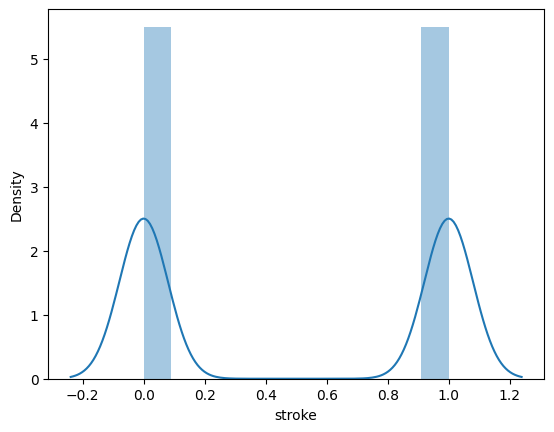

In [1257]:
sns.distplot(y);

In [1258]:
from sklearn.utils import shuffle

In [1259]:
X, y = shuffle(X, y)

In [1260]:
from sklearn.model_selection import train_test_split

In [1261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1262]:
print(X_train.shape, '-' * 10, y_train.shape)
print('=' * 60)
print(X_test.shape, '-' * 10, y_test.shape)

(7776, 10) ---------- (7776,)
(1944, 10) ---------- (1944,)


In [1263]:
inp_shape = [X.shape[1]]
print(inp_shape)

[10]


In [1264]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [1265]:
model = Sequential([
    layers.Dense(units=16, activation='relu', input_shape=inp_shape),
    layers.Dropout(0.2),
    layers.Dense(units=16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=2, activation='sigmoid')
])

In [1266]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [1267]:
hist = model.fit(
    X_train, y_train,
    validation_split=0.2,
    shuffle=True,
    batch_size=256,
    epochs=200,
    verbose=2,
)

Epoch 1/200
25/25 - 1s - loss: 0.6782 - accuracy: 0.5334 - val_loss: 0.6604 - val_accuracy: 0.6028 - 559ms/epoch - 22ms/step
Epoch 2/200
25/25 - 0s - loss: 0.6609 - accuracy: 0.6109 - val_loss: 0.6437 - val_accuracy: 0.6819 - 51ms/epoch - 2ms/step
Epoch 3/200
25/25 - 0s - loss: 0.6461 - accuracy: 0.6481 - val_loss: 0.6216 - val_accuracy: 0.7204 - 48ms/epoch - 2ms/step
Epoch 4/200
25/25 - 0s - loss: 0.6247 - accuracy: 0.6801 - val_loss: 0.5909 - val_accuracy: 0.7461 - 49ms/epoch - 2ms/step
Epoch 5/200
25/25 - 0s - loss: 0.6119 - accuracy: 0.6765 - val_loss: 0.5684 - val_accuracy: 0.7468 - 49ms/epoch - 2ms/step
Epoch 6/200
25/25 - 0s - loss: 0.5992 - accuracy: 0.6915 - val_loss: 0.5500 - val_accuracy: 0.7532 - 51ms/epoch - 2ms/step
Epoch 7/200
25/25 - 0s - loss: 0.5766 - accuracy: 0.7047 - val_loss: 0.5337 - val_accuracy: 0.7648 - 49ms/epoch - 2ms/step
Epoch 8/200
25/25 - 0s - loss: 0.5622 - accuracy: 0.7148 - val_loss: 0.5192 - val_accuracy: 0.7674 - 51ms/epoch - 2ms/step
Epoch 9/200
25

In [1268]:
y_pred = model.predict(X_test)
y_pred[:5]

61/61 [==============================] - 0s 706us/step


array([[0.5948327 , 0.37839067],
       [0.4574342 , 0.55231094],
       [0.6740967 , 0.29180598],
       [0.2660484 , 0.70413816],
       [0.39631468, 0.5854165 ]], dtype=float32)

In [1269]:
y_test[:5]

1825    0
6826    1
3973    0
2583    0
8721    1
Name: stroke, dtype: int64

<img src='https://media.tenor.com/94Pchw0qQVYAAAAM/ratchet-ratchet-cat.gif'>